# Лабораторная работа №6
## Экстремум функции многих переменных
### Выполнила Леонова Анна, группа 427 ИБТС, май 2017 года
Требуется найти экстремум функции двух переменных
$$ f(x_0,x_1) = x_0^2 + x_1^2 - 0.5x_0 - 1.6x_1 + 2 $$
методом Ньютона.
## Метод Ньютона
Исследуемая функция раскладывается в ряд Тейлора около точки x^k, учитываются члены вплоть до второго порядка:
$$ f(x) = f(x^k) + (\nabla f(x^k), (x-x^k)) + 0.5(\nabla ^2 f(x^k)(x-x^k),(x-x^k)) + o||x-x^k||^2 $$
При положительно определённом гессиане глобальный минимум достигается в точке
$$ x^{k+1} = x^k - [\nabla ^2 f(x^k)]^{-1}\nabla f(x^k) $$
При этом справедливо неравенство
$$ f(x^{k+1}) < f(x^k) $$
Тогда получаем формулу итерационного процесса, позволяющую найти k+1-ю точку по значению функции, градиента и гессиана в k-ой. Для квадратичной функции (как в задании) метод сходится за один шаг.

In [2]:
from math import *
import matplotlib.pyplot as plt
import numpy as np


Сначала градиент и гессиан посчитаны аналитически

In [3]:
def func(x):
    x0=x[0][0]
    x1=x[1][0]
    return x0*x0 + x1*x1 - 0.5*x0 - 1.6*x1 +2
def grad(x):
    x0=x[0][0]
    x1=x[1][0]
    #print(x.shape)
    g=np.zeros((x.shape))
    g[0][0]=2*x0-0.5
    g[1][0]=2*x1-1.6
    return g
def hess(x):
    x0=x[0][0]
    x1=x[1][0]
    #print(x.shape) 
    i=x.shape[0]
    #print(i)
    h=np.zeros((i,i))
    h[0][0]=2
    h[1][1]=2
    return h

Затем составлены формулы для поточечного вычисления градиента и гессиана (с использованием конечных разностей)

In [4]:
def deltai(x,d,i):
    delta=np.zeros((x.shape))
    delta[i][0]=d
    return delta

def firstx1(x,d,f,i):
    delta=deltai(x,d,i)
    return(f(x+delta)-f(x))/delta[i][0]


def pointgrad(x,d,f):
    g=np.zeros((x.shape))
    for i in range(x.shape[0]):
        g[i][0]=firstx1(x,d,f,i)
    return g


def pointhess(x,d,f):
    i=x.shape[0]
    h=np.zeros((i,i))
    for j in range(i):
        for k in range(i):
            h[j][k]=(firstx1(x+deltai(x,d,k),d,f,j)-firstx1(x,d,f,j))/d
    return h


Значения, полученные двумя способами, оказались близки друг к другу

In [5]:
start=np.zeros((2,1))
start[0]=1
start[1]=-1
a=func(start)
b=grad(start)
c=hess(start)
print("Значение функции в точке:")
print(a)
print("Градиент и гессиан (аналитические):")
print(b)
print(c)
eps=0.005
b1=pointgrad(start,eps,func)
c1=pointhess(start,eps,func)
print("Градиент и гессиан (поточечные):")
print(b1)
print(c1)

Значение функции в точке:
5.1
Градиент и гессиан (аналитические):
[[ 1.5]
 [-3.6]]
[[ 2.  0.]
 [ 0.  2.]]
Градиент и гессиан (поточечные):
[[ 1.505]
 [-3.595]]
[[ 2.  0.]
 [ 0.  2.]]


Само решение выглядит следующим образом:

Шаг: 
[[-0.75]
 [ 1.8 ]]
Минимум: 
[[ 0.25]
 [ 0.8 ]]
Значение функции в точке: 
1.2975


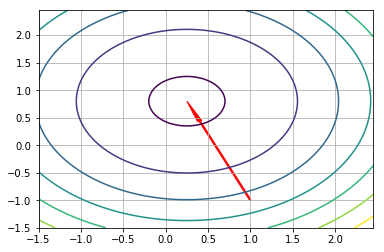

In [7]:
x_curr = np.zeros((2,1))
x_curr = np.linalg.solve(c,-b)
print("Шаг: ")
print(x_curr)
print("Минимум: ")
print(start+x_curr)
print("Значение функции в точке: ")
r=func(start+x_curr)
print(r)

def grap():
    X=np.arange(-1.5,2.5,0.05)
    Y=np.arange(-1.5,2.5,0.05)
    xgrid,ygrid=np.meshgrid(X,Y)
    zgrid=(xgrid*xgrid + ygrid*ygrid - 0.5*xgrid - 1.6*ygrid +2)
    return xgrid,ygrid,zgrid


def drawArrow (axes):

     arrow_x0 = start[0][0]
     arrow_y0 = start[1][0]
     arrow_dx = x_curr[0][0]
     arrow_dy = x_curr[1][0]
     arrow = plt.Arrow (arrow_x0,arrow_y0,arrow_dx,arrow_dy,width=0.09,color="r")
     axes.add_patch (arrow)

axes = plt.gca()
X,Y,Z = grap()
plt.contour(X,Y,Z)

plt.grid()
drawArrow (axes)

plt.show()

Линии уровня представляют собой эллипсы, вектор-шаг из стартовой точки (1,-1) приводит в минимум (0.25,0.8)

Аналитически и поточечно вычисленные градиент и гессиан привели к близким результатам:

In [8]:
def countMin(x_start):
    i=x_start.shape
    x_curr = np.zeros(i)
    x_curr = np.linalg.solve(hess(x_start),-grad(x_start))
    return x_curr+x_start
def pointCountMin(x_start,d,f):
    i=x_start.shape
    x_curr = np.zeros(i)
    x_curr = np.linalg.solve(pointhess(x_start,d,f),-pointgrad(x_start,d,f))
    return x_curr+x_start
x_1 = countMin(start)
print(x_1)
x_2=pointCountMin(start,eps,func)
print(x_2)


[[ 0.25]
 [ 0.8 ]]
[[ 0.2475]
 [ 0.7975]]


Для оценки зависимости погрешности поточечного метода от приращения по координатам введём функцию квадрат нормы и построим график зависимости нормы погрешности от приращения координат, используемого при составлении конечных разностей:

In [9]:
def norma_square(x):
    n=0
    for i in range(x.shape[0]):
        n += (x[i][0])**2
    return n

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in double_scalars


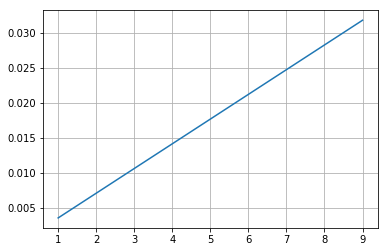

In [10]:
dp=np.zeros((10))
for i in range(dp.shape[0]):
    v=countMin(start)-pointCountMin(start,0.005*i,func)
    dp[i]=(norma_square(v))**0.5
plt.plot(dp)
plt.grid()
plt.show()

Погрешность линейно возрастает с ростом интервала между точками, по которым вычисляются конечные разности.

Чтобы проверить работу метода для функции многих (необязательно двух) переменных, рассмотрим градиент и гессиан квадрата нормы. Минимум этой функции легко находится даже без выкладок на бумаге. Составив аналитические формулы и применив поточечные, опять получаем близкие результаты и можем оценить норму погрешности:

In [13]:


def grad1(x):
    g=np.zeros((x.shape))
    for i in range(x.shape[0]):
        g[i][0]=2*x[i][0]-2*0
    return g
def hess1(x):
    i=x.shape[0]
    h=np.zeros((i,i))
    for j in range(i):
        h[j][j]=2
    return h


Стартовая точка
[[ 10.]
 [  9.]
 [  8.]
 [  7.]
 [  6.]
 [  5.]
 [  4.]
 [  3.]
 [  2.]
 [  1.]]
Шаг:
[[-10.]
 [ -9.]
 [ -8.]
 [ -7.]
 [ -6.]
 [ -5.]
 [ -4.]
 [ -3.]
 [ -2.]
 [ -1.]]
Минимум:
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


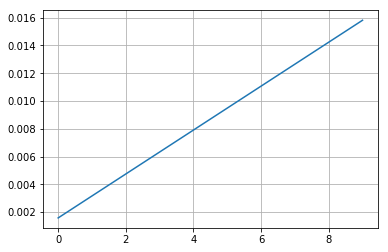

In [15]:
start1 = np.zeros((10,1))
for i in range(start1.shape[0]):
    start1[i][0]=10-i
print("Стартовая точка")
print(start1)

b=grad1(start1)
c=hess1(start1)

x_curr = np.zeros((start1.shape))
x_curr = np.linalg.solve(c,-b)
print("Шаг:")
print(x_curr)
x_curr += start1
print("Минимум:")
print(x_curr)
dp1=np.zeros(10)
for i in range(dp1.shape[0]):
    eps = 0.001*(i+1)
    b1=pointgrad(start1,eps,norma_square)
    c1=pointhess(start1,eps,norma_square)
    x_curr_point=np.linalg.solve(c1,-b1)
    x_curr_point += start1
    dp1[i]=((norma_square(x_curr_point-x_curr))**0.5)

plt.plot(dp1)
plt.grid()
plt.show()

Погрешность снова растёт линейно с ростом интервала между точками, по которым вычислялись конечные разности для поточечных формул

In [4]:
def firstx(x,d):
    delta=np.zeros((x.shape))
    delta[0][0]=d
    return(func(x+delta)-func(x))/delta[0][0]
def firsty(x,d):
    delta=np.zeros((x.shape))
    delta[1][0]=d
    return(func(x+delta)-func(x))/delta[1][0]

def pointgrad(x,d):
    g=np.zeros((x.shape))
    g[0][0]=firstx(x,d)
    g[1][0]=firsty(x,d)
    return g

def pointhess(x,d):
    i=x.shape[0]
    h=np.zeros((i,i))
    deltax=np.zeros((x.shape))
    deltay=np.zeros((x.shape))
    deltax[0][0]=d
    deltay[1][0]=d
    h[0][0]=(firstx(x+deltax,d)-firstx(x,d))/deltax[0][0]
    h[0][1]=(firstx(x+deltay,d)-firstx(x,d))/deltay[1][0]
    h[1][0]=(firsty(x+deltax,d)-firsty(x,d))/deltax[0][0]
    h[1][1]=(firsty(x+deltay,d)-firsty(x,d))/deltay[1][0]
    return h